# This project is to review and update codes in predicting medical appointment no shows originally from Kaggle

# Business problems/questions and objective(s) of in buiding an ML model:
- E.g.,:
        - High no-show rate among medical/healthcare appointment;
        - Which factors are associated with no-show in medical/healthcare appointments?
        - How to to predict no-show appointments? 

# Content
1. Import the data,
2. Explore and prepocess the data,
3. Select and create features (feature engineering), and
4. Build and evaluate the model - Logistic Regression
5. Conclude

## 1. Import the Data

In [36]:
import pandas as pd
import numpy as np
df = pd.read_csv("P:/Learning/Big Data and Machine Learning Resources/Predictive Analytics/Predicting No-shows at medical appointments_Kaggle/KaggleV2-May-2016.csv")


## 2. Explore and prepocess the data

In [37]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [38]:
# Number of Rows and Columns
df.shape

(110527, 14)

The original dataset has 110,527 records and 14 features (input variables)

In [39]:
# Column Names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [40]:
# Target Variable
no_show = df["No-show"].value_counts()
print(no_show)

Percent_no_show = no_show["Yes"]/ no_show.sum() * 100
print("Percent who didn't show up to their appointment:",Percent_no_show )

No     88208
Yes    22319
Name: No-show, dtype: int64
Percent who didn't show up to their appointment: 20.193255946510806


In [41]:
# Recode Target Variable: 0 =  Did not show up to appointment and 1 =  Showed up to appointment
df['No-show'].replace("No", 0,inplace=True)
df['No-show'].replace("Yes", 1,inplace=True)

In [42]:
# Count of Male vs Female
df["Gender"].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [43]:
# Check how each feature relates to the target variable
Exploratory_Analysis = ['Gender','Hipertension','Alcoholism','Diabetes']
for r in Exploratory_Analysis :
    print(df.groupby(r)['No-show'].mean())
#df.groupby('Hipertension')['No-show'].mean()

Gender
F    0.203146
M    0.199679
Name: No-show, dtype: float64
Hipertension
0    0.209037
1    0.173020
Name: No-show, dtype: float64
Alcoholism
0    0.201946
1    0.201488
Name: No-show, dtype: float64
Diabetes
0    0.203628
1    0.180033
Name: No-show, dtype: float64


As shown above, gender does not seem to affect whether a person shows up to an appointment or not, as both males and females don't show up to approximately 20 percent of their appointments. Diabetes and Alcoholism don't seem to affect no-shows as well.

Hypertension seems to have a small affect, as a patient who has hypertension is 3% more likely to show up than a patient who doesn't have hyper tension.

In [44]:
# Check the Handcap column
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

The feature "handicap" has 4 (5!) categories (explanation was not provided on what each category stands for), convert it to a categorical variable and create dummy variables to prepare it for modeling.

In [45]:
# Convert'Handcap' to categorical
df['Handcap'] = pd.Categorical(df['Handcap'])

# Create to Dummy Variables
Handicap = pd.get_dummies(df['Handcap'], prefix = 'Handicap')
df = pd.concat([df, Handicap], axis=1)


In [46]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Handicap_0,Handicap_1,Handicap_2,Handicap_3,Handicap_4
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.321026,0.201933,0.979724,0.018475,0.001656,0.000118,0.000027
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.466873,0.401444,0.140942,0.134662,0.040657,0.010845,0.005210
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# See how each type of handicap affects whether a patient will show up to an appointment 
handicaps = ["Handicap_0", "Handicap_1", "Handicap_2", "Handicap_3", "Handicap_4"]
for h in handicaps:
    print(df.groupby(h)['No-show'].mean())
    

Handicap_0
0    0.181615
1    0.202353
Name: No-show, dtype: float64
Handicap_1
0    0.202360
1    0.179236
Name: No-show, dtype: float64
Handicap_2
0    0.201932
1    0.202186
Name: No-show, dtype: float64
Handicap_3
0    0.201929
1    0.230769
Name: No-show, dtype: float64
Handicap_4
0    0.201929
1    0.333333
Name: No-show, dtype: float64


What stands out is a patient who is handicap_4 is 13 % more likely to not show up to an appointment than a person who is not handicap_4. 

In [13]:
# Check whether the patient received a text reminder
df.groupby('SMS_received')['No-show'].mean()

SMS_received
0    0.167033
1    0.275745
Name: No-show, dtype: float64

Unexpecedately, patients who received a text reminder did not show up to 27% person of their appointments, where as patients who did not receive a text reminder did not show up to 17% of their appointments

## 3. Select and create features (feature engineering)

In [49]:
# Age
min_age = df.Age.min()
print("Min Age:", min_age)
max_age = df.Age.max()
print("Max Age:", max_age)


Min Age: -1
Max Age: 115


Due to the fact that minimum age is said to be -1, I will remove in the next line all records where age is < 0. I will also treat as outliers any age above a 100 due to the lack of people that live more than a 100 years.  

In [15]:
# Exlude minus age and older than 100 years
df = df[(df.Age >= 0) & (df.Age <= 100)]

In [50]:
# Wait Time: rationale - schedule an appointment far in advance and no one reminds, tend to forget about it. 
# Or by the time my appointment day arrives, feel better and don't bother showing up. 

# So, create a variable called "wait_time" to see if the time between the date an appointment was scheduled and the date was the appointment is, has an affect on no-shows.
np.datetime64('2009-01-01') - np.datetime64('2008-01-01')

numpy.timedelta64(366,'D')

In [52]:
import numpy as np

# Converts the two variables to datetime variables
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Create a variable called "AwaitingTime" by subtracting the date the patient made the appointment and the date of the appointment.
df['AwaitingTime'] = df["AppointmentDay"].sub(df["ScheduledDay"], axis=0)

# Convert the result "AwaitingTime" to number of days between appointment day and scheduled day. 
df["AwaitingTime"] = (df["AwaitingTime"] / np.timedelta64(1, 'D')).abs()


In [53]:
# Number of Appointments Missed by Patient:
# Since PatientId is available, create a new variable that adds how many appointments the patient has missed in the past. 
df['Num_App_Missed'] = df.groupby('PatientId')['No-show'].apply(lambda x: x.cumsum())


In [54]:
df['Num_App_Missed'].describe()

count    110527.000000
mean          0.412487
std           0.803626
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          18.000000
Name: Num_App_Missed, dtype: float64

In [55]:
# Review columns we have after the feature engineering
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Handicap_0', 'Handicap_1', 'Handicap_2', 'Handicap_3', 'Handicap_4',
       'AwaitingTime', 'Num_App_Missed'],
      dtype='object')

In [56]:
# I will drop columns that won't be used for modeling
# Drop both ID indicators as they are unique values. 
# Drop Age, ScheduledDay, and AppointmentDay because the engineered variables will take the place of these. 
# Drop Neighbourhood because there are more than 88 neighbourhoods which may model down.
df.drop(["PatientId",'AppointmentID',
         'ScheduledDay','Handcap','AppointmentDay','Neighbourhood'], axis=1, inplace = True)

In [57]:
# Final features and target variable
X = df[['Gender', 'Diabetes','Hipertension', 'Scholarship', 'SMS_received',
        'Handicap_0','Handicap_1','Handicap_2','Handicap_3','Handicap_4', 'Num_App_Missed', 'Age', 'AwaitingTime']]

y = df["No-show"]

In [58]:
# Create dummies for the remaining variables (Gender)
X_train1 = pd.get_dummies(X)

In [59]:
# Normalize the featured data - i.e., scale the data so that all values are between 0 and 1. 

# - Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

# - It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train1)
rescaledX2 = scaler.transform(X_train1)

# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX2[0:5,:])

[[-0.278  2.017 -0.33  -0.688  0.144 -0.137 -0.041 -0.011 -0.005 -0.513
   1.078 -0.615  0.734 -0.734]
 [-0.278 -0.496 -0.33  -0.688  0.144 -0.137 -0.041 -0.011 -0.005 -0.513
   0.818 -0.622 -1.363  1.363]
 [-0.278 -0.496 -0.33  -0.688  0.144 -0.137 -0.041 -0.011 -0.005 -0.513
   1.078 -0.621  0.734 -0.734]
 [-0.278 -0.496 -0.33  -0.688  0.144 -0.137 -0.041 -0.011 -0.005 -0.513
  -1.259 -0.618  0.734 -0.734]
 [ 3.594  2.017 -0.33  -0.688  0.144 -0.137 -0.041 -0.011 -0.005 -0.513
   0.818 -0.622  0.734 -0.734]]


C:\Users\quynhle\AppData\Local\Continuum\anaconda3\envs\Test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\quynhle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


## 4. Build and evaluate the model - Logistic Regression


In [60]:
# 'sklearn.cross_validation' is nolonger available, uses 'sklearn.model_selection' instead
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create Training and Test Dataset with 75% Training and 25% Test
X_train, X_test, y_train, y_test = train_test_split(rescaledX2, y, test_size=0.25)

# Run Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Analyze results
print("Results:")
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",TN / float(TN + FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",FP / float(TN + FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:",metrics.precision_score(y_test, y_pred))

#Sensitivity:
print("Recall:",metrics.recall_score(y_test, y_pred))

C:\Users\quynhle\AppData\Local\Continuum\anaconda3\envs\Test\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Results:
Accuracy 0.8650839606253619
Specificity: 0.9540422070586109
False Positive Rate: 0.04595779294138913
Precision: 0.7330007876082961
Recall: 0.5073596220243504


### Class Distribution

In [61]:
# examine the class distribution of the testing set (using a Pandas Series method)
print("Class Distribution:", y_test.value_counts())
# calculate the percentage of ones
print("Percentage of Ones:", y_test.mean())

# calculate the percentage of zeros
print("Percentage of Zeros:", 1 - y_test.mean())

# calculate null accuracy (for binary classification problems coded as 0/1)
print("Null Accuracy:",max(y_test.mean(), 1 - y_test.mean()))

Class Distribution: 0    22129
1     5503
Name: No-show, dtype: int64
Percentage of Ones: 0.19915315576143602
Percentage of Zeros: 0.800846844238564
Null Accuracy: 0.800846844238564


The null accuracy is ~ 80%, which means that if there is no model, and we 'naivly' predict that everyone will show up, we will be right 80 % of the time. That means tmhe model needs to do better than this base accuracy in order to be useful.

In [62]:
#  'sklearn.cross_validation' is nolonger available, uses 'sklearn.model_selection' instead
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(rescaledX2, y, test_size=0.25, random_state = 42)

tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train2, y_train2)
y_pred2 = tree.predict(X_test2)
print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train2, y_train2)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test2, y_test2)))


# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test2, y_pred2)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",TN / float(TN + FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",FP / float(TN + FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:",metrics.precision_score(y_test2, y_pred2))

#Sensitivity:
print("Recall:",metrics.recall_score(y_test2, y_pred2))

Accuracy on the training subset: 0.926
Accuracy on the test subset: 0.917
Specificity: 0.9318521200054302
False Positive Rate: 0.0681478799945699
Precision: 0.75904
Recall: 0.857401048255919


The Logistic Regression model is 89.88 % accuracate on the test set, which is an improvement of 9.88% better than a naive model. 

Recall: Out of the ones that did not show up, how many did we predict correctly? 50 %

Precision: Out of the ones our model said will not show up, how many didn't ? 72 %



The model is 92 % accuracate on the test set, which is an improvement of 12% better than a naive model.

Recall: Out of the ones that did not show up, how many did we predict correctly? 88 %

Precision: Out of the ones our model said will not show up, how many didn't ? 75 %

To determine which metric to use, we need to do a cost-benefit analysis. 
Implications:
True Positive: Model says patient wil not show up, and they don't
False Positive: Model says patient will not show up, but they do
True Negative: Model says patient will show up, and they do
False Negative: Model says a patient will show up, but they don't

To determine which metric to use, we need to do a cost-benefit analysis. 
If we say a patient will not show up, but they do, the office would be booked and patients will have to wait and they will get upset. If we say a patient will show up, but they don't then the doctor's office will lose money because another patient could have been served at that time. 

Based on domain knowledge and past experiences, the office would rather overbook than have empty time in their schedule. Therefore, recall is the metric they care about, and based on recall, the decision tree clasifier performed the best at 88%. 

### Most important features

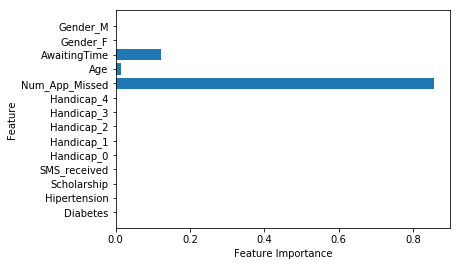

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
n_features = X_train1.shape[1]
plt.barh(range(n_features), tree.feature_importances_, )
plt.yticks(np.arange(n_features), X_train1)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Most important features are:
    - Age of the patient
    - WaitingTime (how long in advanced was appointment scheduled)
    - Number of appointments missed in the past
    


### Explore Important Features 

In [ ]:
# Age
bins = [0, 20, 40, 60, 100]
age_groups = df.groupby(pd.cut(df.Age, bins))
age_groups["No-show"].mean()


- Patients over 40 are more likely to show up than patients under 40, and 
- patients over the age of 60 are 7% more likely to shows up than patients under 40.

In [64]:
# Awaiting Time
bins = [0,1,7, 180]
wait_time = df.groupby(pd.cut(df.AwaitingTime, bins))
wait_time["No-show"].mean()

AwaitingTime
(0, 1]      0.066361
(1, 7]      0.247025
(7, 180]    0.320561
Name: No-show, dtype: float64

## Conclude

- People who scheduled 1 day or less in advance of their appointment, did not show up only 6.6 % of the time. 
- Those that scheduled more than 1 day but less than 1 week in advance, did not show up 25 % of the time, and 
- Those who scheduled more than 2 weeks in advance did not show up more than 30% of the time.
- Discussion:?